In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = 'ev_cat_01-24.csv'  # Updated to your file
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure
print(data.head())



       Date  FOUR WHEELER (INVALID CARRIAGE)  HEAVY GOODS VEHICLE  \
0         0                                0                    0   
1  01/01/01                                0                    1   
2  01/01/02                                0                    2   
3  01/01/03                                0                    1   
4  01/01/04                                0                    2   

   HEAVY MOTOR VEHICLE  HEAVY PASSENGER VEHICLE  LIGHT GOODS VEHICLE  \
0                    0                        0                    0   
1                    0                        0                    9   
2                    1                        0                  266   
3                    2                        0                   35   
4                    0                        1                   14   

   LIGHT MOTOR VEHICLE  LIGHT PASSENGER VEHICLE  MEDIUM GOODS VEHICLE  \
0                    0                        0                     0   
1     

In [16]:
# Clean the 'Date' column by removing any non-date values (e.g., "0")
# Filtering out rows where 'Date' is invalid
data = data[data['Date'] != '0']

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Drop rows where 'Date' could not be converted (NaT values)
data = data.dropna(subset=['Date'])

C:\Users\amina\AppData\Local\Temp\ipykernel_21048\3676260942.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


In [17]:
data

,Date,FOUR WHEELER (INVALID CARRIAGE),HEAVY GOODS VEHICLE,HEAVY MOTOR VEHICLE,HEAVY PASSENGER VEHICLE,LIGHT GOODS VEHICLE,LIGHT MOTOR VEHICLE,LIGHT PASSENGER VEHICLE,MEDIUM GOODS VEHICLE,MEDIUM PASSENGER VEHICLE,MEDIUM MOTOR VEHICLE,OTHER THAN MENTIONED ABOVE,THREE WHEELER(NT),TWO WHEELER (INVALID CARRIAGE),THREE WHEELER(T),TWO WHEELER(NT),TWO WHEELER(T)
1,2001-01-01,0,1,0,0,9,15,1,0,0,0,2,0,0,2,62,0
2,2002-01-01,0,2,1,0,266,11,5,0,0,0,0,0,0,2,11,0
3,2003-01-01,0,1,2,0,35,15,1,0,0,0,1,0,0,9,18,0
4,2004-01-01,0,2,0,1,14,17,1,0,0,1,2,0,0,1,21,0
5,2005-01-01,0,0,0,0,10,14,1,0,0,0,0,0,0,1,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,2019-01-12,0,0,0,41,18,57,49,0,10,0,197,15,1,14412,1900,333
280,2020-01-12,0,0,0,10,1,505,18,0,0,0,124,17,1,10230,4564,384
281,2021-01-12,2,0,1,218,16,2483,133,0,2,0,124,17,0,24115,26150,494
282,2022-01-12,0,0,0,146,30,2925,915,0,15,0,673,35,0,35604,64525,138


In [18]:
# Drop rows where 'Date' could not be converted (NaT values)
data = data.dropna(subset=['Date'])

# Ensure all columns except 'Date' are numeric for plotting
for col in data.columns[1:]:
    data[col] = pd.to_numeric(data[col], errors='coerce')


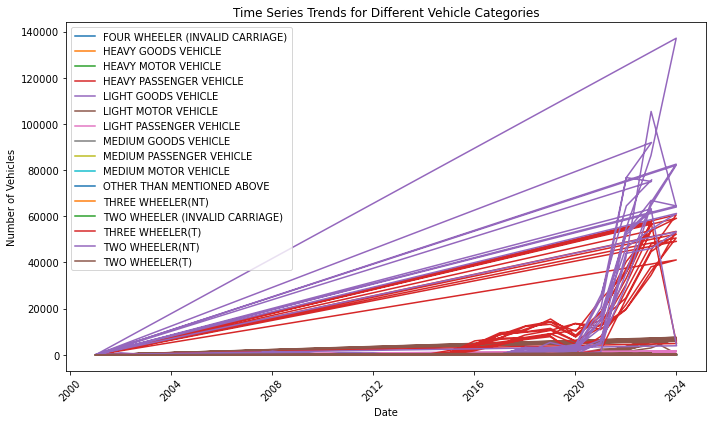

In [19]:
# Convert the 'Date' and all vehicle category columns to NumPy arrays for plotting
date_array = np.array(data['Date'])
category_arrays = {category: np.array(data[category]) for category in data.columns[1:]}

# Plot Time Series Trends for different vehicle categories
plt.figure(figsize=(10, 6))
for category, values in category_arrays.items():
    plt.plot(date_array, values, label=category)
plt.title('Time Series Trends for Different Vehicle Categories')
plt.xlabel('Date')
plt.ylabel('Number of Vehicles')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
# Group categories for better visualization
two_wheelers = ['TWO WHEELER (INVALID CARRIAGE)', 'TWO WHEELER(NT)', 'TWO WHEELER(T)']
three_wheelers = ['THREE WHEELER(NT)', 'THREE WHEELER(T)']
heavy_vehicles = ['HEAVY GOODS VEHICLE', 'HEAVY MOTOR VEHICLE', 'HEAVY PASSENGER VEHICLE']
light_vehicles = ['LIGHT GOODS VEHICLE', 'LIGHT MOTOR VEHICLE', 'LIGHT PASSENGER VEHICLE']



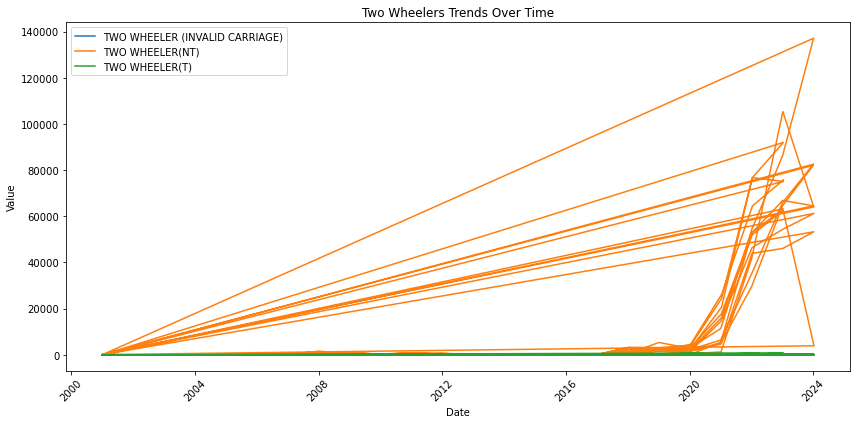

In [25]:
plt.figure(figsize=(12, 6))

for category in two_wheelers:
    if category in data.columns:
        plt.plot(data['Date'].to_numpy(), data[category].to_numpy(), label=category)

plt.title('Two Wheelers Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

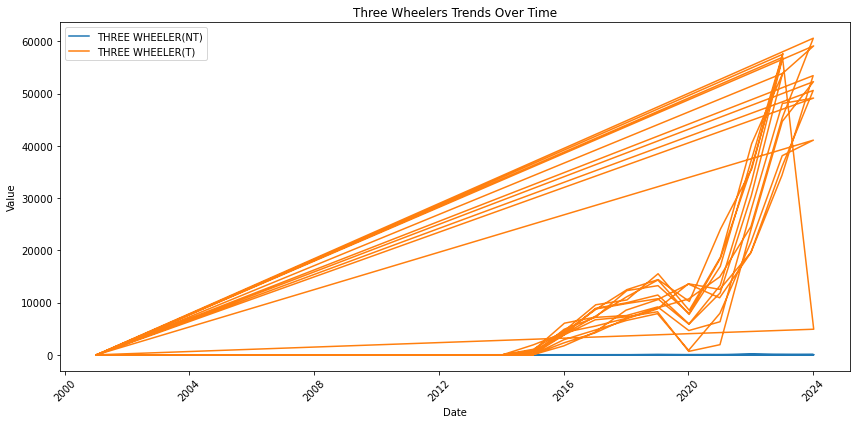

In [27]:

plt.figure(figsize=(12, 6))

for category in three_wheelers:
    if category in data.columns:
        plt.plot(data['Date'].to_numpy(), data[category].to_numpy(), label=category)

plt.title('Three Wheelers Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

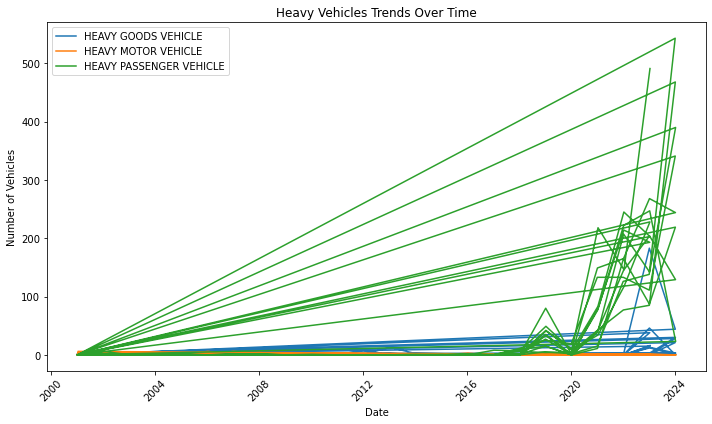

In [29]:
# Plot Heavy Vehicles
plt.figure(figsize=(10, 6))
for category in heavy_vehicles:
    plt.plot(data['Date'].to_numpy(), data[category].to_numpy(), label=category)
plt.title('Heavy Vehicles Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Vehicles')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

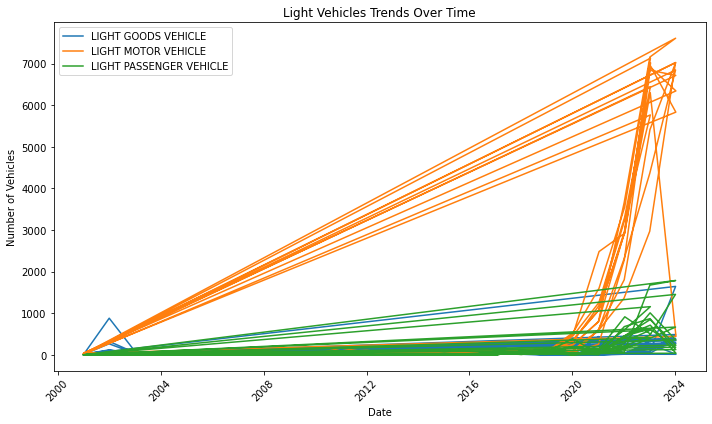

In [30]:
# Plot Light Vehicles
plt.figure(figsize=(10, 6))
for category in light_vehicles:
    plt.plot(data['Date'].to_numpy(), data[category].to_numpy(), label=category)
plt.title('Light Vehicles Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Vehicles')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

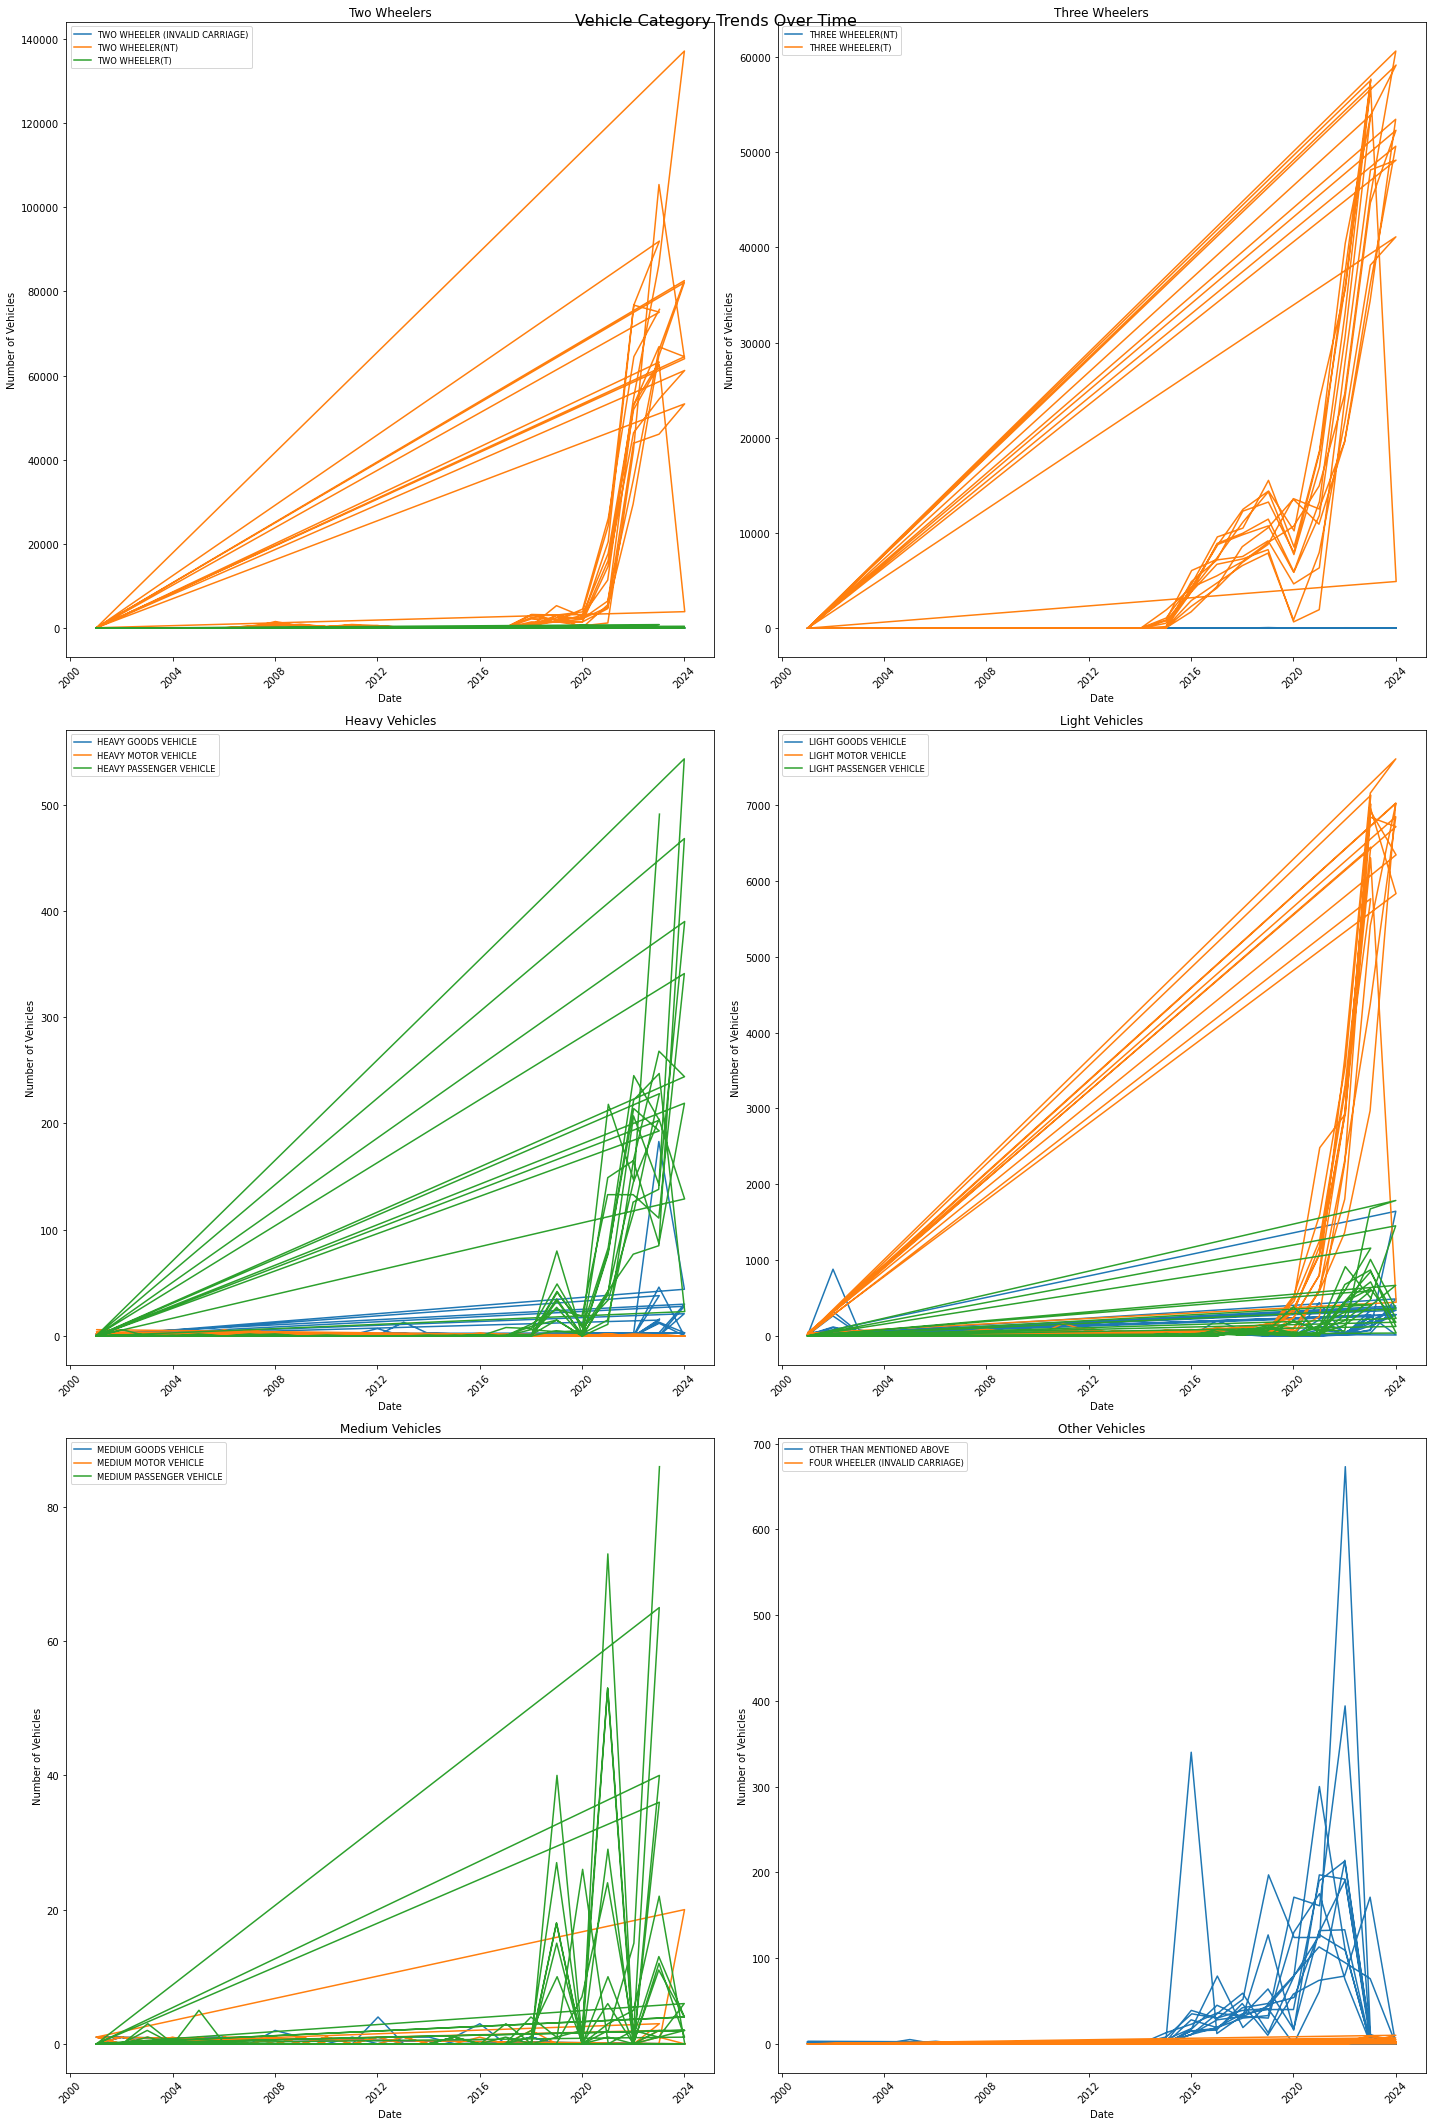

In [35]:
import matplotlib.pyplot as plt
import numpy as np

def plot_vehicle_categories(data, vehicle_groups):
    n_groups = len(vehicle_groups)
    fig, axs = plt.subplots(3, 2, figsize=(20, 30))  # 3x2 grid of subplots
    fig.suptitle('Vehicle Category Trends Over Time', fontsize=16)

    for (group_name, categories), ax in zip(vehicle_groups.items(), axs.flatten()):
        for category in categories:
            if category in data.columns:
                x = data['Date'].to_numpy()
                y = data[category].to_numpy()
                ax.plot(x, y, label=category)
        
        ax.set_title(f'{group_name}')
        ax.set_xlabel('Date')
        ax.set_ylabel('Number of Vehicles')
        ax.legend(fontsize='small')
        ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

# Vehicle groups dictionary
vehicle_groups = {
    'Two Wheelers': ['TWO WHEELER (INVALID CARRIAGE)', 'TWO WHEELER(NT)', 'TWO WHEELER(T)'],
    'Three Wheelers': ['THREE WHEELER(NT)', 'THREE WHEELER(T)'],
    'Heavy Vehicles': ['HEAVY GOODS VEHICLE', 'HEAVY MOTOR VEHICLE', 'HEAVY PASSENGER VEHICLE'],
    'Light Vehicles': ['LIGHT GOODS VEHICLE', 'LIGHT MOTOR VEHICLE', 'LIGHT PASSENGER VEHICLE'],
    'Medium Vehicles': ['MEDIUM GOODS VEHICLE', 'MEDIUM MOTOR VEHICLE', 'MEDIUM PASSENGER VEHICLE'],
    'Other Vehicles': ['OTHER THAN MENTIONED ABOVE', 'FOUR WHEELER (INVALID CARRIAGE)']
}

# Call the function
plot_vehicle_categories(data, vehicle_groups)

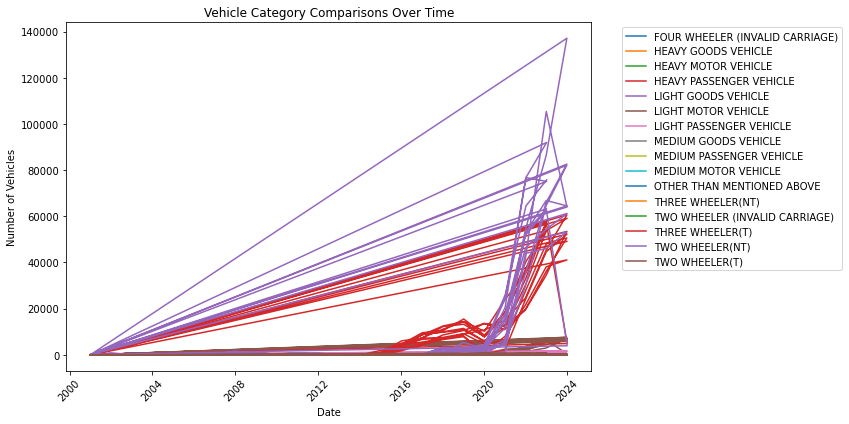

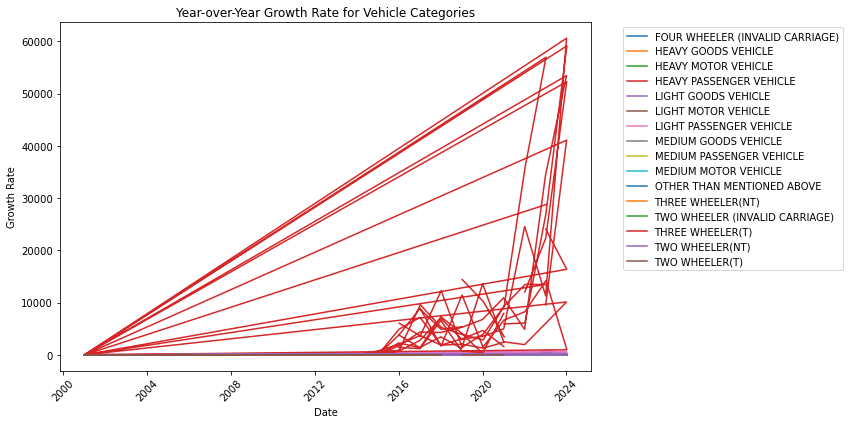

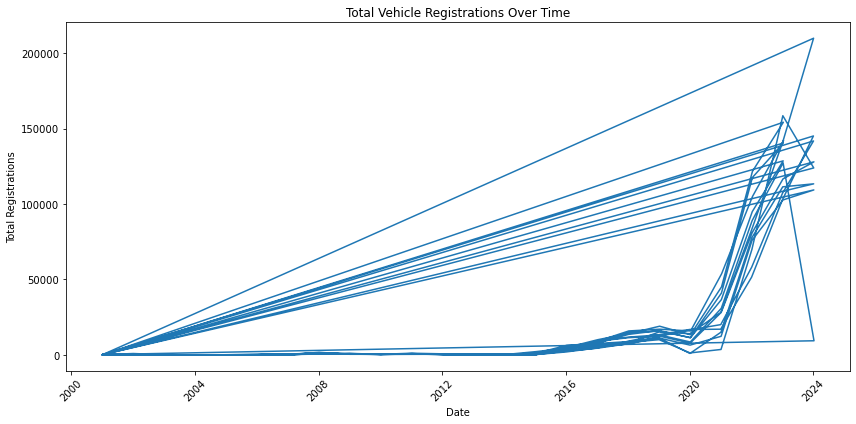

                                Date  FOUR WHEELER (INVALID CARRIAGE)  \
count                            283                       283.000000   
mean   2012-05-11 00:30:31.802120192                         0.342756   
min              2001-01-01 00:00:00                         0.000000   
25%              2006-01-11 12:00:00                         0.000000   
50%              2012-01-11 00:00:00                         0.000000   
75%              2018-01-09 12:00:00                         0.000000   
max              2024-01-08 00:00:00                        10.000000   
std                              NaN                         1.225834   

       HEAVY GOODS VEHICLE  HEAVY MOTOR VEHICLE  HEAVY PASSENGER VEHICLE  \
count           283.000000           283.000000               283.000000   
mean              2.169611             0.515901                28.731449   
min               0.000000             0.000000                 0.000000   
25%               0.000000            

C:\Users\amina\anaconda3\lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\amina\anaconda3\lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\amina\anaconda3\lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame with 'Date' as the first column

# Calculate Year-over-Year Growth Rate
def calculate_yoy_growth(data):
    data_indexed = data.set_index('Date')
    growth_rates = data_indexed.pct_change(periods=12).fillna(0)
    return growth_rates.reset_index()

# Plot functions
def plot_vehicle_categories(data):
    plt.figure(figsize=(12, 6))
    x = data['Date'].to_numpy()
    for category in data.columns[1:]:
        y = data[category].to_numpy()
        plt.plot(x, y, label=category)
    plt.title('Vehicle Category Comparisons Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Vehicles')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_growth_rates(growth_rates):
    plt.figure(figsize=(12, 6))
    x = growth_rates['Date'].to_numpy()
    for category in growth_rates.columns[1:]:
        y = growth_rates[category].to_numpy()
        plt.plot(x, y, label=category)
    plt.title('Year-over-Year Growth Rate for Vehicle Categories')
    plt.xlabel('Date')
    plt.ylabel('Growth Rate')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_total_registrations(data):
    total_registrations = data.iloc[:, 1:].sum(axis=1)
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'].to_numpy(), total_registrations.to_numpy())
    plt.title('Total Vehicle Registrations Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Registrations')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Main execution
growth_rates = calculate_yoy_growth(data)

# Generate plots
plot_vehicle_categories(data)
plot_growth_rates(growth_rates)
plot_total_registrations(data)

# Print summary statistics
print(data.describe())
print("\nGrowth Rates Summary:")
print(growth_rates.describe())

__DEMOGRAPHIC AND PSYCHOGRAPHIC SEGMENTATION__

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df= pd.read_csv('train.csv')  


df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


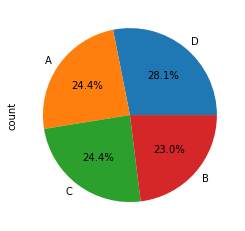

In [59]:
df['Segmentation'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

In [60]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Load your DataFrame (assuming it's already in df)

# Handling missing values
imputer = SimpleImputer(strategy='mean')
df['Work_Experience'] = imputer.fit_transform(df[['Work_Experience']])
df['Family_Size'] = imputer.fit_transform(df[['Family_Size']])

# Converting categorical variables to numerical using LabelEncoder
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])  # Male = 1, Female = 0
df['Ever_Married'] = encoder.fit_transform(df['Ever_Married'])  # Yes = 1, No = 0
df['Graduated'] = encoder.fit_transform(df['Graduated'])  # Yes = 1, No = 0
df['Profession'] = encoder.fit_transform(df['Profession'])
df['Spending_Score'] = encoder.fit_transform(df['Spending_Score'])  # Assuming Low, Average, High categories
df['Var_1'] = encoder.fit_transform(df['Var_1'])

# Check the data structure after encoding
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   int32  
 2   Ever_Married     8068 non-null   int32  
 3   Age              8068 non-null   int64  
 4   Graduated        8068 non-null   int32  
 5   Profession       8068 non-null   int32  
 6   Work_Experience  8068 non-null   float64
 7   Spending_Score   8068 non-null   int32  
 8   Family_Size      8068 non-null   float64
 9   Var_1            8068 non-null   int32  
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int32(6), int64(2), object(1)
memory usage: 504.4+ KB


In [61]:
# Select features for clustering (excluding ID and Segmentation columns)
X = df.drop(columns=['ID', 'Segmentation'])

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


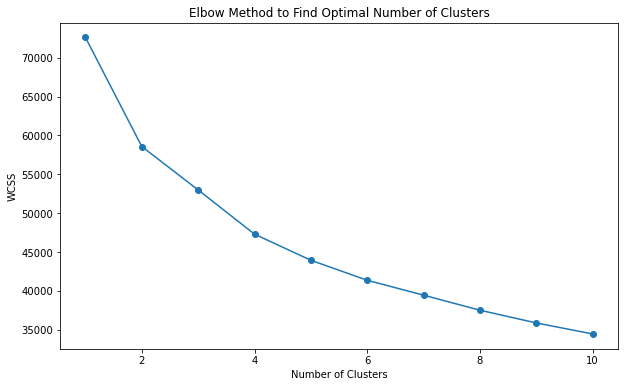

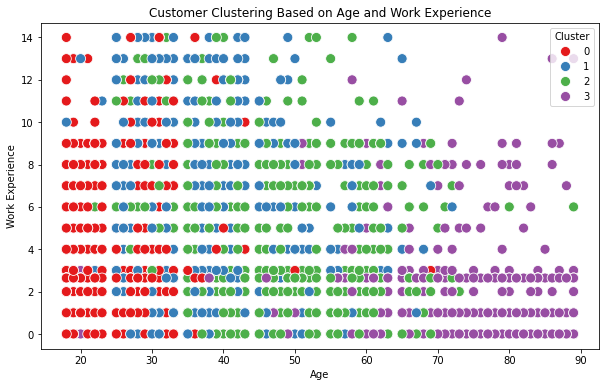

Cluster Centers:
[[ 0.55661802  0.11172622 27.30800201  0.17413186  4.32209361  2.50288924
   1.96728737  3.98211594  3.65072974]
 [ 0.44115044  0.35973451 40.00353982  0.91681416  1.60973451  3.57888245
   1.99070796  1.88330217  4.37566372]
 [ 0.58409181  1.033241   46.54570637  0.7700831   1.52829442  2.56593422
   0.26355362  3.20548299  4.16383063]
 [ 0.64760433  0.98686244 68.31607419  0.58732612  5.55641422  1.36577108
   1.46676971  2.10649796  4.59659969]]


In [63]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Find the optimal number of clusters using the elbow method
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Find Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Apply KMeans with the optimal number of clusters (for example, k=4)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)



# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Work_Experience', hue='Cluster', data=df, palette='Set1', s=100)

# Add title and labels
plt.title('Customer Clustering Based on Age and Work Experience')
plt.xlabel('Age')
plt.ylabel('Work Experience')
plt.legend(title='Cluster')
plt.show()

# Print the cluster centers for reference
print("Cluster Centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))


In [64]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
score = silhouette_score(X_scaled, df['Cluster'])
print(f'Silhouette Score: {score}')


Silhouette Score: 0.18138170070003598


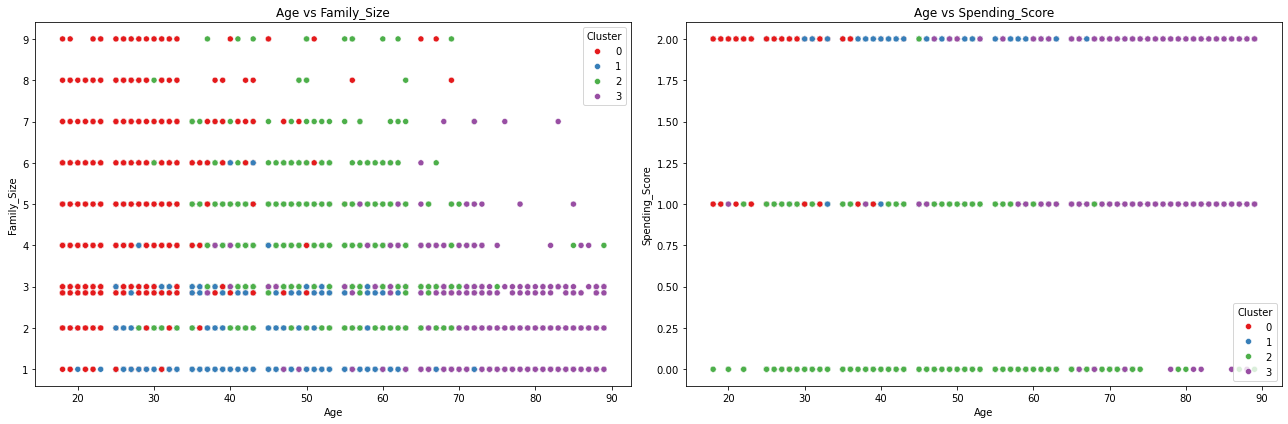

In [65]:
# Plotting Age against all other variables and colored by clusters
variables_to_plot = ['Family_Size', 'Spending_Score']
fig, axes = plt.subplots(1, len(variables_to_plot), figsize=(18, 6))

for i, var in enumerate(variables_to_plot):
    sns.scatterplot(ax=axes[i], data=df, x='Age', y=var, hue='Cluster', palette='Set1')
    axes[i].set_title(f'Age vs {var}')
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()